In [1]:
from rnncomp.dataman import *
from rnncomp.augman import *
from rnncomp.constants import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
dat, desc = mk_cls_dataset(t_len=0.1, dims=2, n_classes=3, freq=5, class_type="flat", save_dir=None)
print(desc)
print(dat.shape)

{'dims': 2, 'SEED': 0, 'class_type': 'flat', 'n_classes': 3, 't_len': 0.1}
(3, 1, 2, 100)


In [4]:
f_dat = np.tile(dat, (1, 3, 1, 1))
print(f_dat.shape)

(3, 3, 2, 100)


In [5]:
assert np.all(f_dat[1, 1, 1] == f_dat[1, 2, 1])

In [6]:
print(f_dat[1, 1, 1, :10])
print(f_dat[1, 2, 1, :10])
print(f_dat[0, 1, 1, :10])
print(f_dat[0, 2, 1, :10])

[ 0.625  0.625  0.625  0.625  0.625  0.625  0.625  0.625  0.625  0.625]
[ 0.625  0.625  0.625  0.625  0.625  0.625  0.625  0.625  0.625  0.625]
[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25]
[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25]


In [7]:
nengo_dat, nengo_cor = make_run_args_nengo(f_dat)
print(nengo_dat.shape)
print(nengo_cor.shape)

(9, 2, 110)
(9, 3)


In [8]:
dd, cc = make_run_args_nengo(dat)
print(dd.shape)
print(cc.shape)

(3, 2, 110)
(3, 3)


In [9]:
ad, ac = make_run_args_ann(dd, cc)
print(ad.shape)
print(ac.shape)

(330, 1, 2)
(330, 1, 3)


In [10]:
ann_dat, ann_cor = make_run_args_ann(nengo_dat, nengo_cor)
print(ann_dat.shape)
print(ann_cor.shape)

(990, 1, 2)
(990, 1, 3)


In [13]:
print(f_dat.shape)
res_dat = np.array(aug(f_dat, desc, 3, add_rand_noise, kwargs={"scale": 0.01, "sig": True}, save_dir=None))
print(res_dat.shape)

(3, 3, 2, 100)
(3, 3, 2, 100)


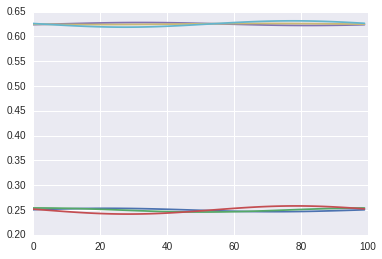

In [16]:
plt.plot(res_dat[0, 0, 1])
plt.plot(res_dat[0, 1, 1])
plt.plot(res_dat[0, 2, 1])

plt.plot(res_dat[1, 0, 1])
plt.plot(res_dat[1, 1, 1])
plt.plot(res_dat[1, 2, 1])